In [1]:
# import libraries

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import matplotlib
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.ma as ma

import os
import matplotlib.colors as colors

import scipy
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import glob

print ('libraries imported')

libraries imported


In [2]:
#read all diff sst spatialmean jja (SST) files

from os import walk

f = []
mypath = "/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_pr/jja"

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    break
    
f

['PMIP4_piControl_diff_pr_spatialmean_jja.nc',
 'PMIP4_historical_diff_pr_spatialmean_jja.nc']

In [3]:
def plotmap(field_to_plot, lat, lon, filename):

    cmap= plt.get_cmap('BrBG') #define colour map
    clim=[-8,8]
    bounds = np.linspace(clim[0], clim[1], 21)
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    region=[-80, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]
    projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
    transform= ccrs.PlateCarree()
    plt.figure(figsize=(10,7))
    ax= plt.axes(projection=projection)
    ax.coastlines()
    gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    fig=ax.contourf(lon, lat, field_to_plot, levels=bounds, transform=transform, cmap=cmap, norm=norm)
    ax.set_extent(region, ccrs.PlateCarree())
    cax, kw = matplotlib.colorbar.make_axes(ax,location='right', pad=0.05, shrink=0.77)
    plt.colorbar(fig,cax=cax, extend='both', **kw)   
    cb = plt.colorbar(fig,cax=cax, extend='both', **kw)
    cb.set_label(label='Precipitation Bias (mm $day^{-1}$)', size=19)
    plt.savefig(filename, bbox_inches='tight',pad_inches = 0.02)
    

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDepre

masked_array(
  data=[[-0.59524084, -0.60111611, -0.57728998, ..., -0.56556855,
         -0.57962872, -0.59524084],
        [-0.8006113 , -0.81455742, -0.75819212, ..., -0.72944378,
         -0.76332274, -0.8006113 ],
        [-0.61738425, -0.62823491, -0.58513098, ..., -0.55746739,
         -0.58673409, -0.61738425],
        ...,
        [ 0.14811304,  0.14157516,  0.1415374 , ...,  0.15786659,
          0.15697033,  0.14811304],
        [ 0.0752046 ,  0.06709698,  0.05567169, ...,  0.07794047,
          0.08170163,  0.0752046 ],
        [ 0.0263862 ,  0.02305368,  0.0172784 , ...,  0.0266562 ,
          0.02865569,  0.0263862 ]],
  mask=False,
  fill_value=1e+20)

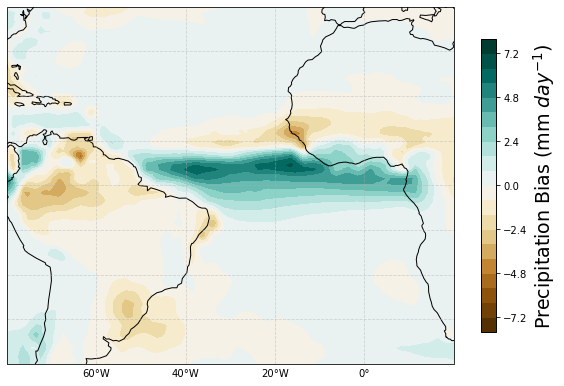

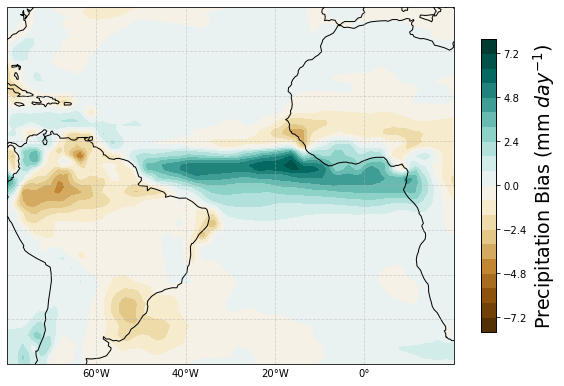

In [4]:
#open datasets
variable_name= 'pr_spatialmean_jja'

for filename in f:
    data_object = xr.open_dataset(f'/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_pr/jja/{filename}', decode_times=False)
    ensemble_mean = data_object.mean(dim='gcms', skipna=True, keep_attrs=True)
    field_to_plot = ensemble_mean[variable_name]
    lat=ensemble_mean['lat']
    lon=ensemble_mean['lon']
    field_to_plot, lon = add_cyclic_point(field_to_plot, coord=lon)
    output_filename = f'/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/diff_pr/jja/{filename}'+'.png'
    plotmap(field_to_plot, lat, lon, output_filename)
    
field_to_plot

In [5]:
#read all diff pr spatialmean djf (pr) files

from os import walk

f = []
mypath = "/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_pr/djf"

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    break
    
f

['PMIP4_historical_diff_pr_spatialmean_djf.nc',
 'PMIP4_piControl_diff_pr_spatialmean_djf.nc']

In [4]:
def plotmap(field_to_plot, lat, lon, filename):

    cmap= plt.get_cmap('BrBG') #define colour map
    clim=[-8,8]
    bounds = np.linspace(clim[0], clim[1], 21)
    norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
    region=[-80, 20, -40, 40] #[lon_min, lon_max, lat_min, lat_max]
    projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
    transform= ccrs.PlateCarree()
    plt.figure(figsize=(10,7))
    ax= plt.axes(projection=projection)
    ax.coastlines()
    gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = True
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    fig=ax.contourf(lon, lat, field_to_plot, levels=bounds, transform=transform, cmap=cmap, norm=norm)
    ax.set_extent(region, ccrs.PlateCarree())
    #cax, kw = matplotlib.colorbar.make_axes(ax,location='right', pad=0.05, shrink=0.77)
    #plt.colorbar(fig,cax=cax, extend='both', **kw)   
    #cb = plt.colorbar(fig,cax=cax, extend='both', **kw)
    #cb.set_label(label='Precipitation Bias (mm $day^{-1}$)', size=19)   
    plt.savefig(filename, bbox_inches='tight',pad_inches = 0.02)
    

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning

masked_array(
  data=[[-0.07072663, -0.07639345, -0.06678978, ..., -0.04994639,
         -0.06021435, -0.07072663],
        [-0.19276645, -0.20732103, -0.1866489 , ..., -0.14308324,
         -0.16716054, -0.19276645],
        [-0.13865854, -0.15377845, -0.1458468 , ..., -0.09962133,
         -0.11657473, -0.13865854],
        ...,
        [ 0.02942971,  0.02629807,  0.01449126, ...,  0.02715899,
          0.0298049 ,  0.02942971],
        [ 0.0246068 ,  0.01594767, -0.00371461, ...,  0.02827933,
          0.02970837,  0.0246068 ],
        [-0.00148379, -0.00550291, -0.01415759, ...,  0.00057134,
          0.00102866, -0.00148379]],
  mask=False,
  fill_value=1e+20)

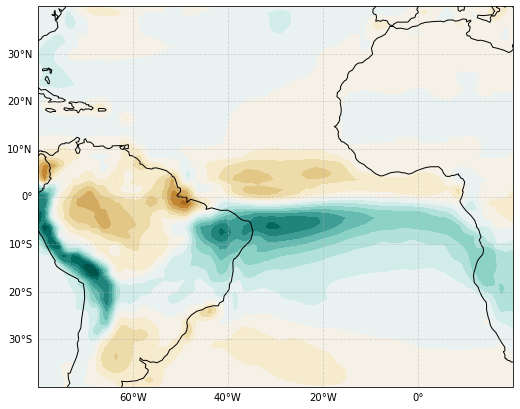

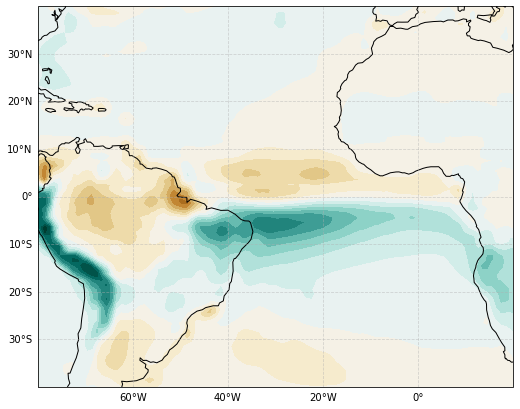

In [7]:
#open datasets
variable_name= 'pr_spatialmean_djf'

for filename in f:
    data_object = xr.open_dataset(f'/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_pr/djf/{filename}', decode_times=False)
    ensemble_mean = data_object.mean(dim='gcms', skipna=True, keep_attrs=True)
    field_to_plot = ensemble_mean[variable_name]
    lat=ensemble_mean['lat']
    lon=ensemble_mean['lon']
    field_to_plot, lon = add_cyclic_point(field_to_plot, coord=lon)
    output_filename = f'/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/diff_pr/djf/{filename}'+'.png'
    plotmap(field_to_plot, lat, lon, output_filename)
    
field_to_plot

In [2]:
#read all diff pr spatialmean mam (pr) files

from os import walk

f = []
mypath = "/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_pr/mam"

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    break
    
f

['PMIP4_piControl_diff_pr_spatialmean_mam.nc',
 'PMIP4_historical_diff_pr_spatialmean_mam.nc']

/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/milesryan-cummings/opt/anaconda3/envs/xesmf_env/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning

masked_array(
  data=[[-0.90811575, -0.93221985, -0.888959  , ..., -0.82798474,
         -0.86166341, -0.90811575],
        [-1.42981505, -1.48609607, -1.38433951, ..., -1.24184156,
         -1.32092988, -1.42981505],
        [-1.05067024, -1.09089753, -1.01582881, ..., -0.91044469,
         -0.9700433 , -1.05067024],
        ...,
        [ 0.12804146,  0.13235611,  0.13919554, ...,  0.12121295,
          0.12432669,  0.12804146],
        [ 0.10402014,  0.11347605,  0.12333504, ...,  0.08764677,
          0.09439151,  0.10402014],
        [ 0.09336008,  0.09760123,  0.10179643, ...,  0.08601246,
          0.08899257,  0.09336008]],
  mask=False,
  fill_value=1e+20)

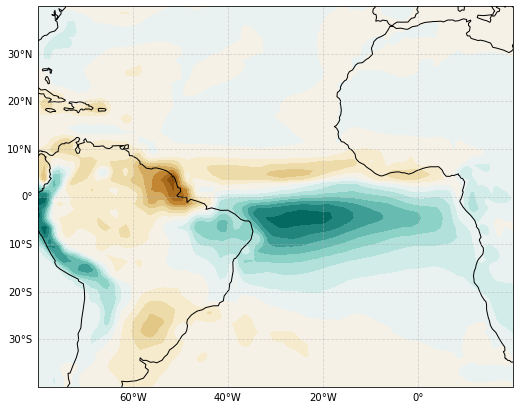

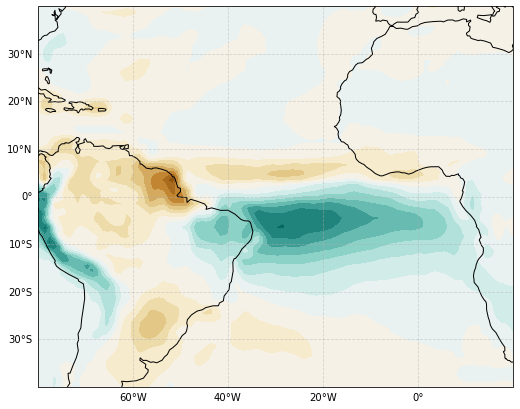

In [5]:
#open datasets
variable_name= 'pr_spatialmean_mam'

for filename in f:
    data_object = xr.open_dataset(f'/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_pr/mam/{filename}', decode_times=False)
    ensemble_mean = data_object.mean(dim='gcms', skipna=True, keep_attrs=True)
    field_to_plot = ensemble_mean[variable_name]
    lat=ensemble_mean['lat']
    lon=ensemble_mean['lon']
    field_to_plot, lon = add_cyclic_point(field_to_plot, coord=lon)
    output_filename = f'/Users/milesryan-cummings/Desktop/dissertation/outputs/figs/diff_pr/mam/{filename}'+'.png'
    plotmap(field_to_plot, lat, lon, output_filename)
    
field_to_plot

In [ ]:
#read all diff sst spatialmean amm (pr) files

from os import walk

f = []
mypath = "/Users/milesryan-cummings/Desktop/dissertation/outputs/netcdf/diff_pr/amm"

for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    break
    
f